# normaliztion  data nu compress karke 0 to 1 di range vic leke ande ne

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv('wine_data.csv',usecols=[0,1,2])
df.columns=['class_label','alcohol','malic_acid']
df.head(3)

,class_label,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36


<Axes: xlabel='alcohol', ylabel='Density'>

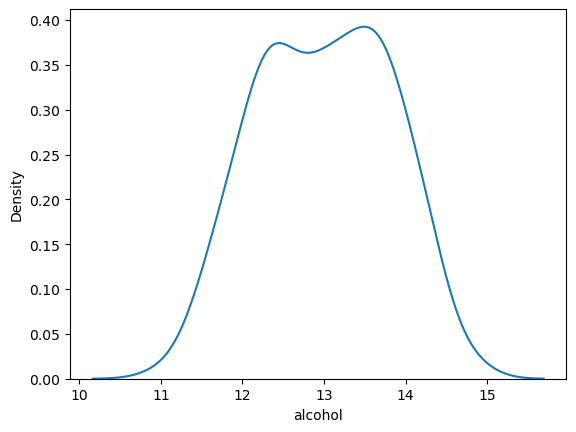

In [29]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic_acid', ylabel='Density'>

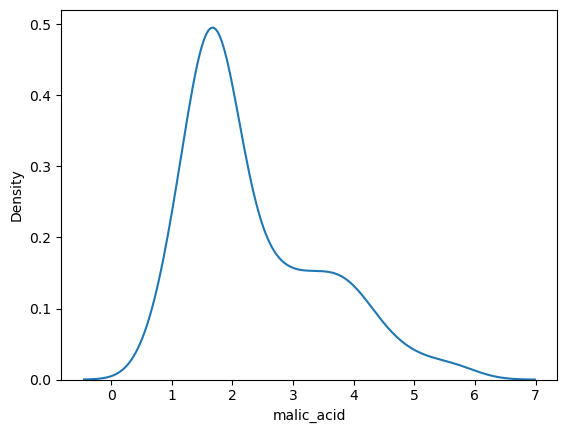

In [30]:
sns.kdeplot(df['malic_acid'])

<Axes: xlabel='alcohol', ylabel='malic_acid'>

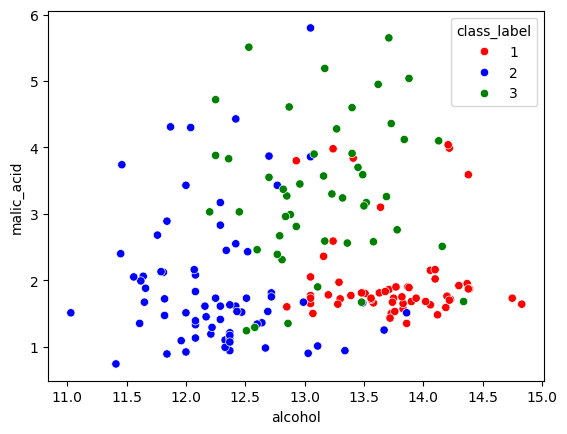

In [31]:
color_dict={1:'r',3:'g',2:'b'}
sns.scatterplot(x='alcohol',y='malic_acid',data=df,hue=df['class_label'],palette=color_dict)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('class_label',axis=1),df['class_label'],test_size=0.3,random_state=0)

In [33]:
x_train.shape , x_test.shape

((124, 2), (54, 2))

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

# fit the scaler to the train set
scaler.fit(x_train)

# transform dovaan nu karna
x_train_scaled=scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [35]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [36]:
np.round(x_train.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [37]:
np.round(x_train_scaled.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'after normaliztion')

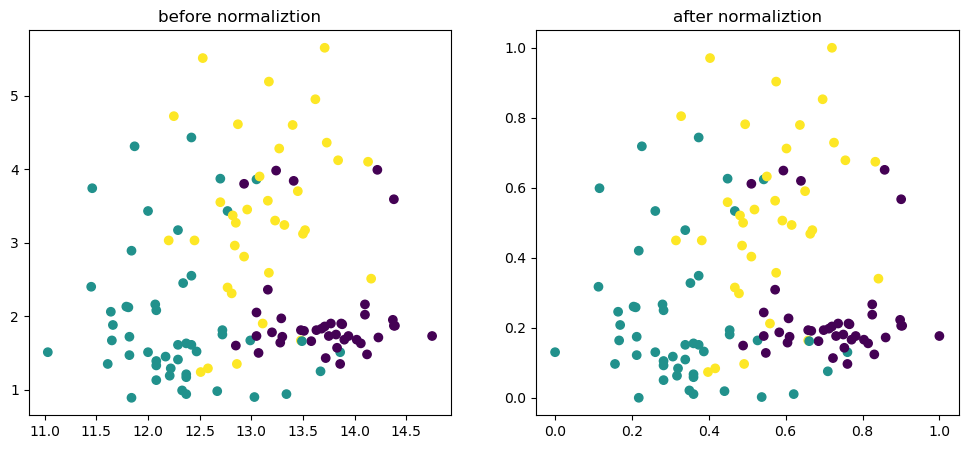

In [38]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['alcohol'],x_train['malic_acid'],c=y_train)
ax1.set_title("before normaliztion")


ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['malic_acid'],c=y_train)
ax2.set_title("after normaliztion")

Text(0.5, 1.0, 'after normaliztion')

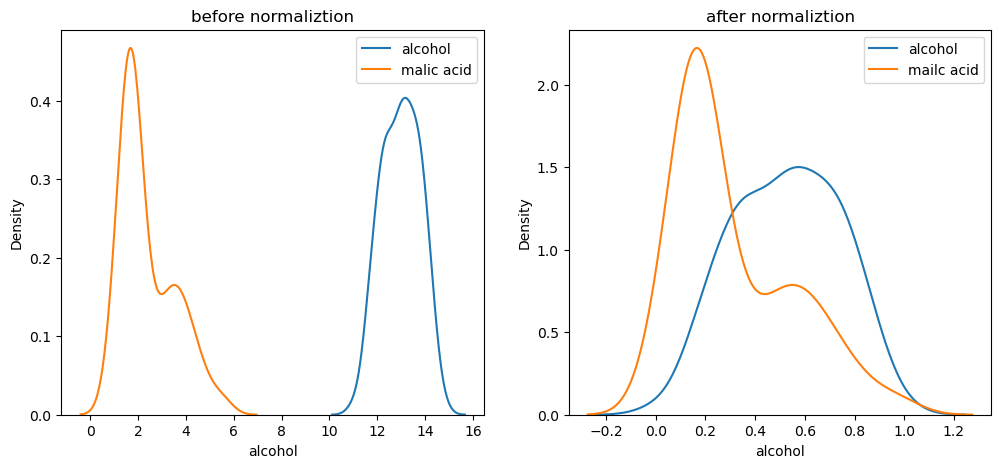

In [44]:
fig,(ax1 , ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(x_train['alcohol'],ax=ax1,label='alcohol')
sns.kdeplot(x_train['malic_acid'],ax=ax1,label='malic acid')
ax1.legend()
ax1.set_title('before normaliztion')

sns.kdeplot(x_train_scaled['alcohol'],ax=ax2,label='alcohol')
sns.kdeplot(x_train_scaled['malic_acid'],ax=ax2,label='mailc acid')
ax2.legend()
ax2.set_title('after normaliztion')

Text(0.5, 1.0, 'distribution of alcohol before normaliztion')

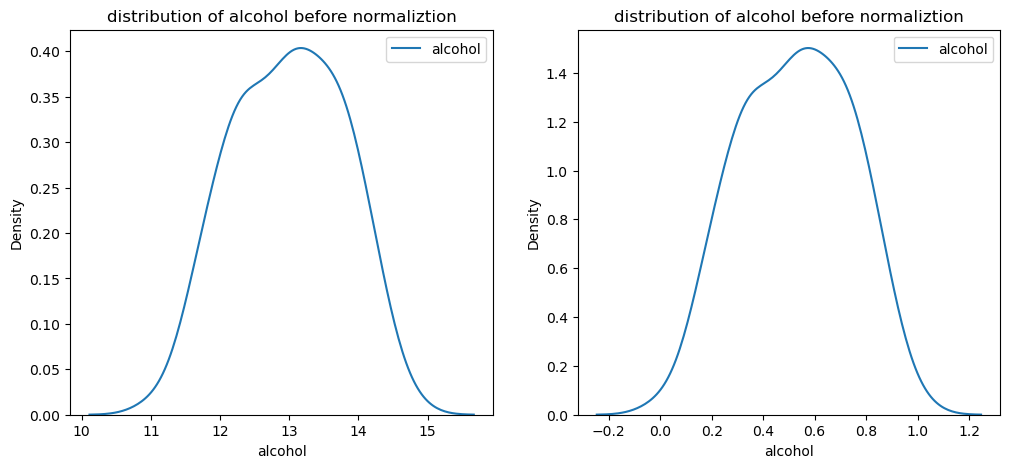

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(x_train["alcohol"],ax=ax1,label="alcohol")
ax1.legend()
ax1.set_title('distribution of alcohol before normaliztion')

sns.kdeplot(x_train_scaled["alcohol"],ax=ax2,label="alcohol")
ax2.legend()
ax2.set_title('distribution of alcohol before normaliztion')        # distribution same rendi bas scaling hundi aa sclae change ho janda